In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [36]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BR.csv")

In [4]:
df.head()

,Unnamed: 0,weight,Finished,RecordedDate,B2,B4,E5,ISO_3,country_agg,region_agg,date_from_file,date,ISO2,age,B1_1.1,B1_1.2,B1_1.NA,B1_2.1,B1_2.2,B1_2.NA,B1_3.1,B1_3.2,B1_3.NA,B1_4.1,B1_4.2,B1_4.NA,B1_5.1,B1_5.2,B1_5.NA,B1_6.1,B1_6.2,B1_6.NA,B1_7.1,B1_7.2,B1_7.NA,B1_8.1,B1_8.2,B1_8.NA,B1_9.1,B1_9.2,B1_9.NA,B1_10.1,B1_10.2,B1_10.NA,B1_11.1,B1_11.2,B1_11.NA,B1_12.1,B1_12.2,B1_12.NA,B3.1,B3.2,B3.NA,B5.1,B5.2,B5.NA,B6.1,B6.2,B6.NA,B7.1,B7.2,B7.NA,B8.1,B8.2,B8.3,B8.NA
0,24,5261.439254,1,2020-12-01 00:19:58,3.0,NaN,4.0,BRA,Brazil,Pernambuco,2020-12-01,2020-12-01,BR,1.0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,28,11363.454224,0,2020-12-01 04:32:13,15.0,NaN,NaN,BRA,Brazil,Pernambuco,2020-12-01,2020-12-01,BR,3.0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0
2,33,26895.887754,1,2020-12-01 01:09:26,4.0,NaN,3.0,BRA,Brazil,NaN,2020-12-01,2020-12-01,BR,4.0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,48,6775.519937,1,2020-12-01 00:34:55,NaN,NaN,1.0,BRA,Brazil,Amazonas,2020-12-01,2020-12-01,BR,3.0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
4,62,4481.196444,1,2020-12-01 00:59:22,1.0,NaN,2.0,BRA,Brazil,São Paulo,2020-12-01,2020-12-01,BR,3.0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0


In [5]:
df.tail()

,Unnamed: 0,weight,Finished,RecordedDate,B2,B4,E5,ISO_3,country_agg,region_agg,date_from_file,date,ISO2,age,B1_1.1,B1_1.2,B1_1.NA,B1_2.1,B1_2.2,B1_2.NA,B1_3.1,B1_3.2,B1_3.NA,B1_4.1,B1_4.2,B1_4.NA,B1_5.1,B1_5.2,B1_5.NA,B1_6.1,B1_6.2,B1_6.NA,B1_7.1,B1_7.2,B1_7.NA,B1_8.1,B1_8.2,B1_8.NA,B1_9.1,B1_9.2,B1_9.NA,B1_10.1,B1_10.2,B1_10.NA,B1_11.1,B1_11.2,B1_11.NA,B1_12.1,B1_12.2,B1_12.NA,B3.1,B3.2,B3.NA,B5.1,B5.2,B5.NA,B6.1,B6.2,B6.NA,B7.1,B7.2,B7.NA,B8.1,B8.2,B8.3,B8.NA
169534,2442185,6257.499967,1,2021-06-07 06:01:10,NaN,NaN,3.0,BRA,Brazil,São Paulo,2021-06-07,2021-06-07,BR,2.0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0
169535,2442187,3155.744103,1,2021-06-07 13:10:11,4.0,NaN,4.0,BRA,Brazil,São Paulo,2021-06-07,2021-06-07,BR,1.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
169536,2442189,10690.725533,1,2021-06-07 07:35:21,NaN,1.0,3.0,BRA,Brazil,São Paulo,2021-06-07,2021-06-07,BR,3.0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
169537,2442201,7357.937072,1,2021-06-07 02:42:50,2.0,NaN,1.0,BRA,Brazil,São Paulo,2021-06-07,2021-06-07,BR,4.0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
169538,2442219,7693.873821,0,2021-06-07 10:04:53,6.0,NaN,NaN,BRA,Brazil,São Paulo,2021-06-07,2021-06-07,BR,NaN,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0


In [6]:
df.shape

(169539, 66)

# Pre-processing dataframe

In [37]:
df = df.assign(Cli=0)
df = df.assign(Cli_who=0)

In [38]:
df.columns.values


array(['Unnamed: 0', 'weight', 'Finished', 'RecordedDate', 'B2', 'B4',
       'E5', 'ISO_3', 'country_agg', 'region_agg', 'date_from_file',
       'date', 'ISO2', 'age', 'B1_1.1', 'B1_1.2', 'B1_1.NA', 'B1_2.1',
       'B1_2.2', 'B1_2.NA', 'B1_3.1', 'B1_3.2', 'B1_3.NA', 'B1_4.1',
       'B1_4.2', 'B1_4.NA', 'B1_5.1', 'B1_5.2', 'B1_5.NA', 'B1_6.1',
       'B1_6.2', 'B1_6.NA', 'B1_7.1', 'B1_7.2', 'B1_7.NA', 'B1_8.1',
       'B1_8.2', 'B1_8.NA', 'B1_9.1', 'B1_9.2', 'B1_9.NA', 'B1_10.1',
       'B1_10.2', 'B1_10.NA', 'B1_11.1', 'B1_11.2', 'B1_11.NA', 'B1_12.1',
       'B1_12.2', 'B1_12.NA', 'B3.1', 'B3.2', 'B3.NA', 'B5.1', 'B5.2',
       'B5.NA', 'B6.1', 'B6.2', 'B6.NA', 'B7.1', 'B7.2', 'B7.NA', 'B8.1',
       'B8.2', 'B8.3', 'B8.NA', 'Cli', 'Cli_who'], dtype=object)

In [39]:
lista_valor_cli_BR =[]
for i in range(len(df)):
  if (df['B1_1.1'][i] ==1 and (df['B1_2.1'][i] ==1 or df['B1_3.1'][i]==1)):
    lista_valor_cli_BR.append(1)
  else:
    lista_valor_cli_BR.append(0)


df['Cli']=lista_valor_cli_BR

In [40]:
lista_valor_cli_who_BR =[]
for i in range(len(df)):
  if (df['B1_1.1'][i] ==1 and df['B1_2.1'][i] ==1 and df['B1_4.1'][i]==1):
    lista_valor_cli_who_BR.append(1)
  else:
    lista_valor_cli_who_BR.append(0)
df['Cli_who']=lista_valor_cli_who_BR

In [41]:
df.shape

(169539, 68)

In [42]:
df_na =df

In [43]:
df_na.shape

(169539, 68)

In [44]:
# Delete NA
col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA']

for i in range(len(col_names)):
  df = df.drop(df[df[col_names[i]]==1].index)

In [45]:
df.shape

(164538, 68)

In [46]:
# dataframe without NA
df1 = df

In [47]:
# dataframe with NA

df_NA = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BR.csv")

# Creating our dataframe

In [16]:
#df_ok = df[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B1_13.1','B1_14.1','B8.1']]

df1_ok = df1[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1']]

df_ok_NA = df_NA[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1']]

In [17]:
df1_ok.shape

(164538, 13)

In [18]:
df_ok_NA.shape

(169539, 25)

# Data Visualization

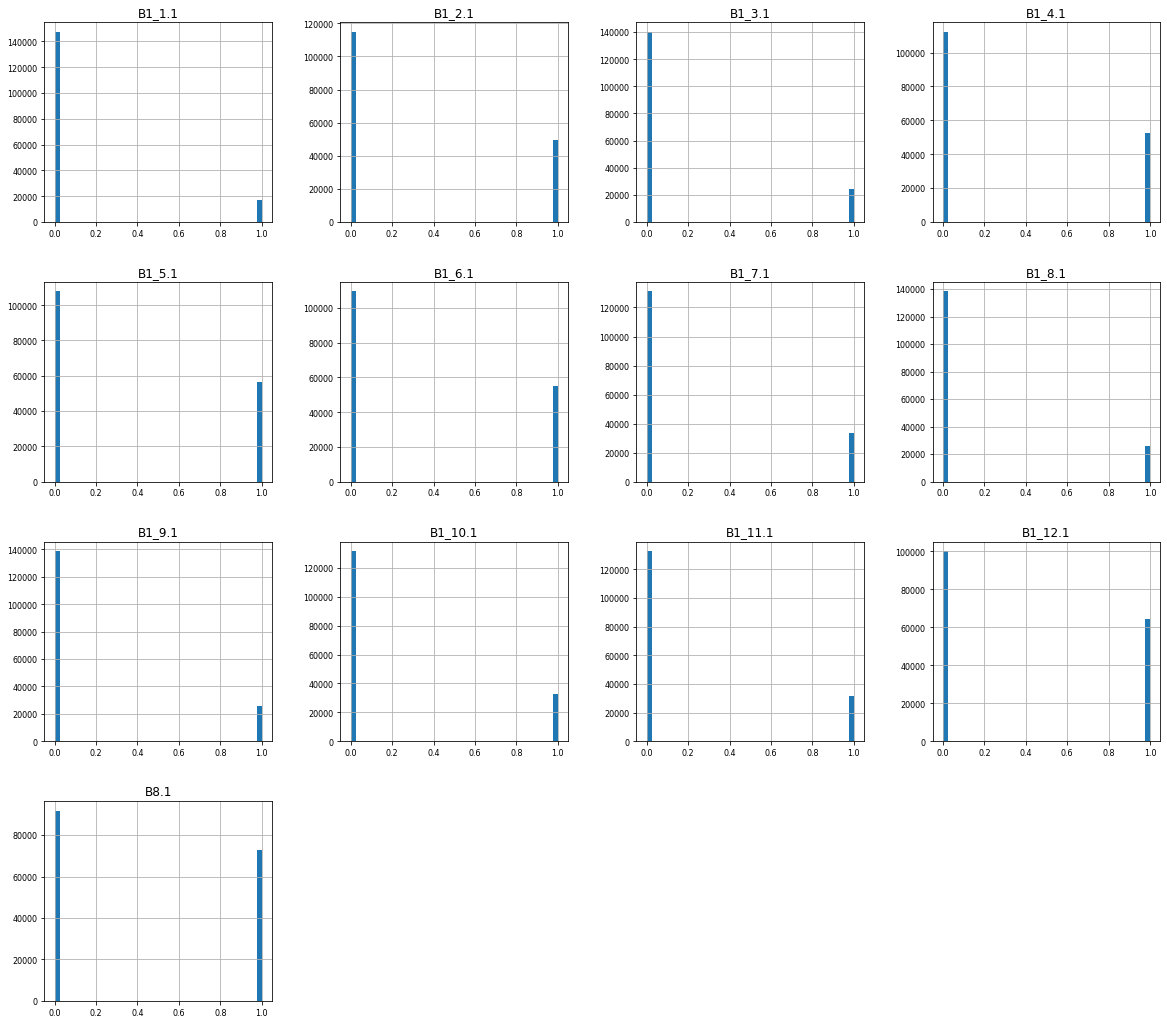

In [ ]:
df1_ok.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

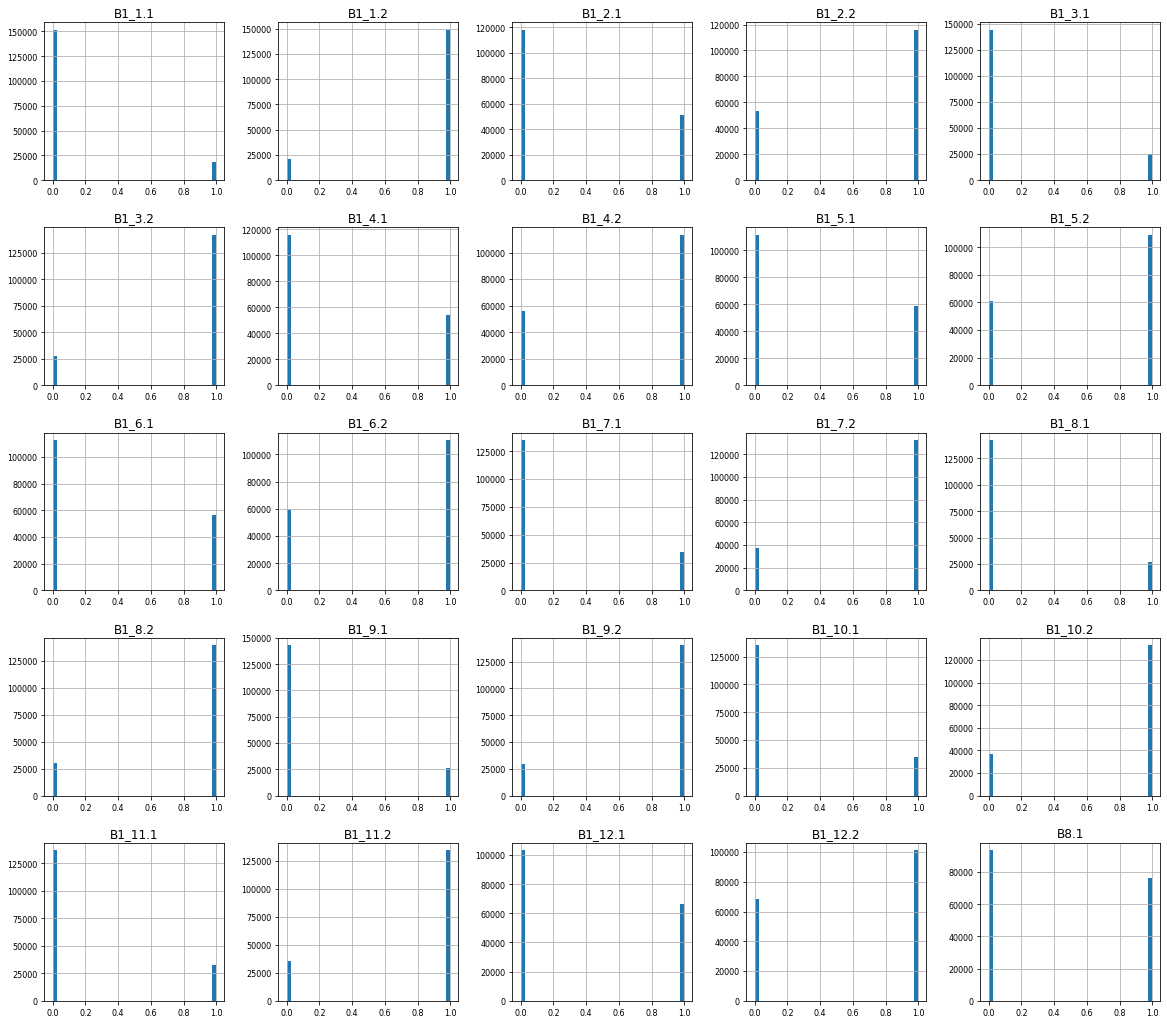

In [ ]:
df_ok_NA.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

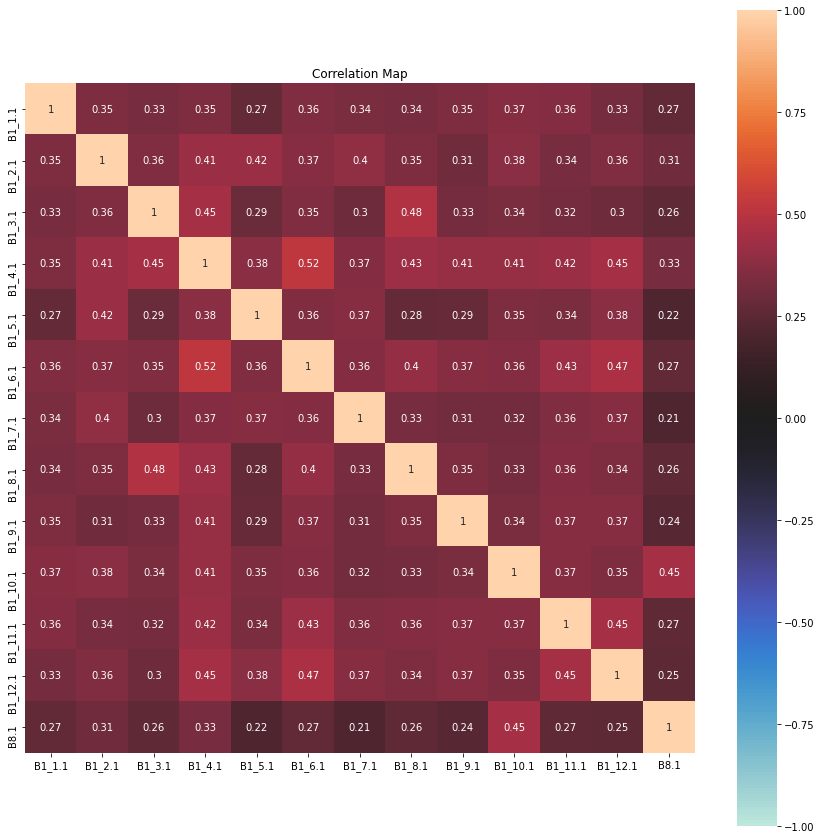

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df1_ok.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

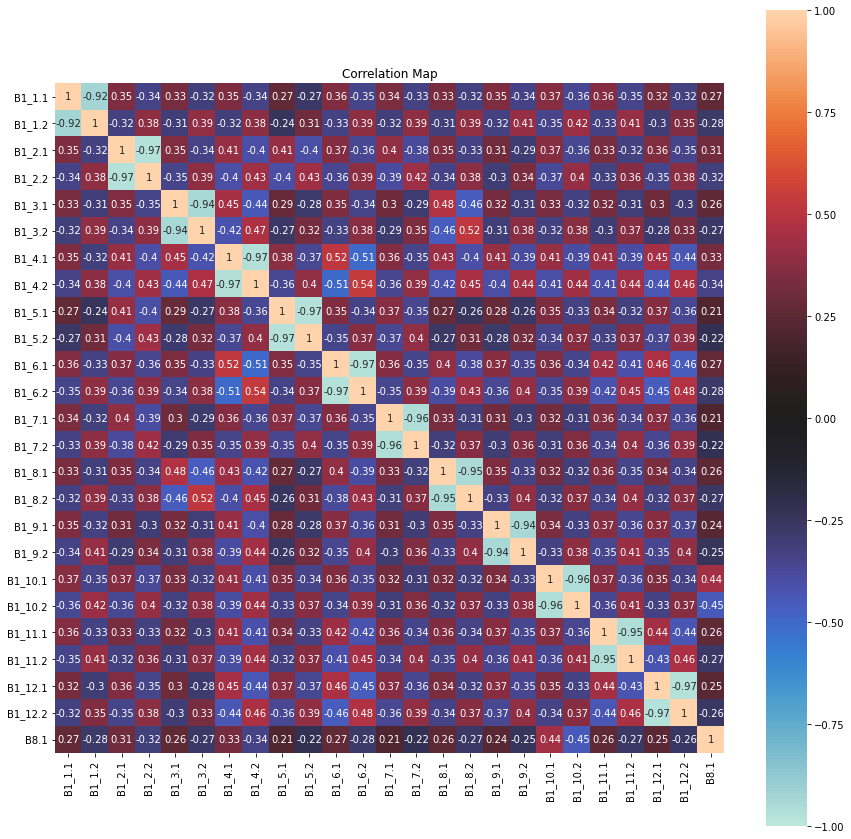

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df_ok_NA.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

### Output

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fd3d140d0>]],
      dtype=object)

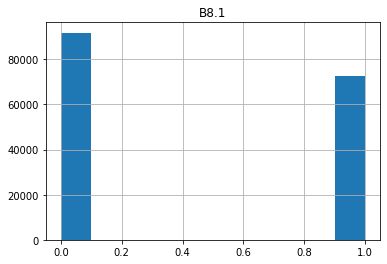

In [ ]:
df1_ok.hist('B8.1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fd33aa6d0>]],
      dtype=object)

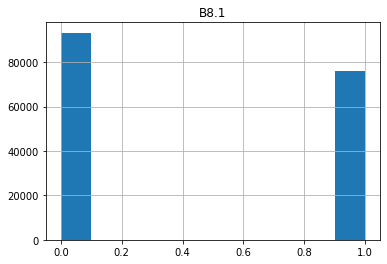

In [ ]:
df_ok_NA.hist('B8.1')

# Training & Test

In [19]:
X = df1_ok.drop(['B8.1'], axis=1)
Y = df1_ok['B8.1']

X_NA = df_ok_NA.drop(['B8.1'], axis=1)
Y_NA = df_ok_NA['B8.1']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA, Y_NA, test_size = 0.2, random_state=2)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print()
print(X_train_NA.shape)
print(X_test_NA.shape)
print(Y_train_NA.shape)
print(Y_test_NA.shape)

(131630, 12)
(32908, 12)
(131630,)
(32908,)

(135631, 24)
(33908, 24)
(135631,)
(33908,)


In [ ]:
'''
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)
'''

'\nX_norm = preprocessing.scale(X_train)\nscaler = preprocessing.StandardScaler().fit(X_train)\nX_train_norm = scaler.transform(X_train)\nX_test_norm = scaler.transform(X_test)\nprint(X_train_norm.shape)\nprint(X_test_norm.shape)\n'

## Decision Tree

### df1_ok

In [ ]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [ ]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)


{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 50}


Accuracy: 0.7371459827397593
              precision    recall  f1-score   support

           0       0.71      0.90      0.79     18406
           1       0.80      0.54      0.64     14502

    accuracy                           0.74     32908
   macro avg       0.76      0.72      0.72     32908
weighted avg       0.75      0.74      0.73     32908

[[16492  1914]
 [ 6736  7766]]


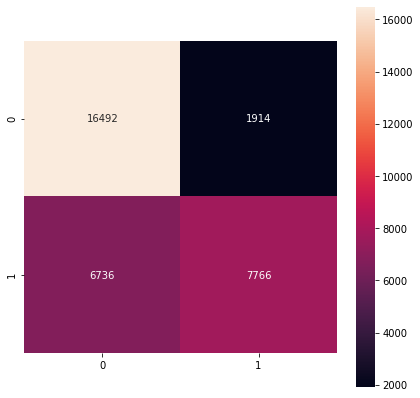

In [ ]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_predicted = my_model.predict(X_test)

print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))
matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_predicted))


In [ ]:
my_tree.get_depth()
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

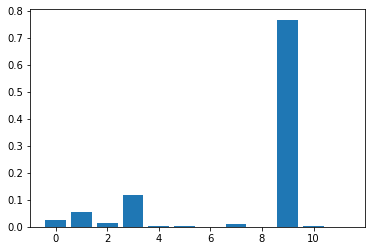

In [ ]:
from matplotlib import pyplot
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1']
dot_data = export_graphviz(my_tree,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('BR_tree_df1_ok.png')

True

### df_ok_NA

In [ ]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [ ]:
dtree_model_NA=tree.DecisionTreeClassifier()

dtree_model_NA = GridSearchCV(dtree_model_NA, param_grid, cv=3)

dtree_model_NA=dtree_model_NA.fit(X_train_NA, Y_train_NA)
print(dtree_model_NA.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 200}


Accuracy: 0.7385277810546184
              precision    recall  f1-score   support

           0       0.71      0.88      0.79     18759
           1       0.80      0.56      0.66     15149

    accuracy                           0.74     33908
   macro avg       0.75      0.72      0.72     33908
weighted avg       0.75      0.74      0.73     33908

[[16588  2171]
 [ 6695  8454]]


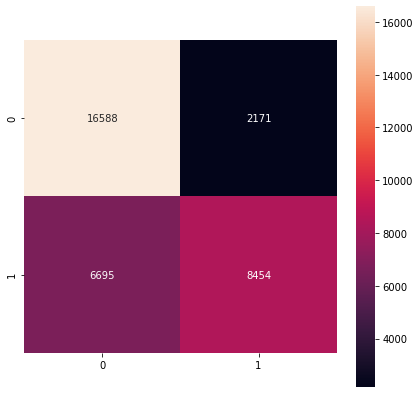

In [ ]:
my_model_NA = dtree_model_NA.best_estimator_
my_tree_NA=my_model_NA.fit(X_train_NA, Y_train_NA)

y_predicted = my_model_NA.predict(X_test_NA)

print('Accuracy:',accuracy_score(Y_test_NA, y_predicted))
print(classification_report(Y_test_NA, y_predicted))
matrix = confusion_matrix(Y_test_NA, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_predicted))

In [ ]:
my_tree_NA.get_depth()
my_tree_NA.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 200,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

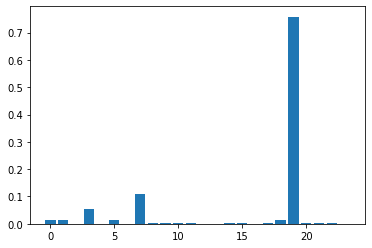

In [ ]:
from matplotlib import pyplot
importance=my_tree_NA.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2']
dot_data = export_graphviz(my_tree_NA,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('BR_tree_df_ok_NA.png')

True

## Random Forest

### df1_ok

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
my_model = CV_rfc.best_estimator_
RF =my_model.fit(X_train, Y_train)


In [ ]:
y_pred = RF.predict(X_test)

Accuracy: 0.7389996353470281
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     18406
           1       0.80      0.54      0.65     14502

    accuracy                           0.74     32908
   macro avg       0.76      0.72      0.72     32908
weighted avg       0.75      0.74      0.73     32908

[[16446  1960]
 [ 6629  7873]]


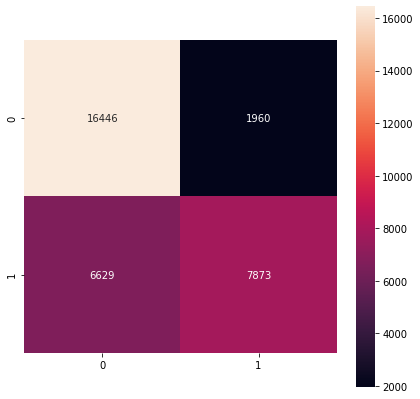

In [ ]:
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_pred))

### df_ok_NA

In [ ]:
rfc_NA=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc_NA = GridSearchCV(estimator=rfc_NA, param_grid=param_grid, cv= 3)
CV_rfc_NA.fit(X_train_NA, Y_train_NA)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
CV_rfc_NA.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
my_model_NA = CV_rfc_NA.best_estimator_
RF_NA =my_model_NA.fit(X_train_NA, Y_train_NA)

In [ ]:
y_pred_NA = RF_NA.predict(X_test_NA)

Accuracy: 0.7399728677598207
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     18759
           1       0.80      0.56      0.66     15149

    accuracy                           0.74     33908
   macro avg       0.76      0.72      0.72     33908
weighted avg       0.75      0.74      0.73     33908

[[16606  2153]
 [ 6664  8485]]


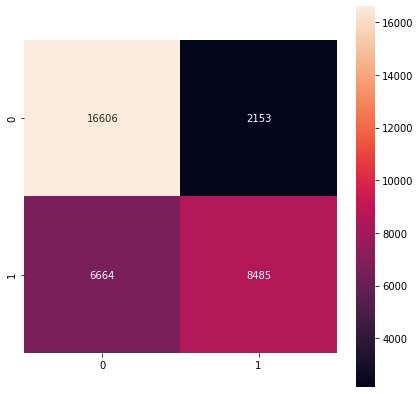

In [ ]:
print('Accuracy:',accuracy_score(Y_test_NA, y_pred_NA))
print(classification_report(Y_test_NA, y_pred_NA))
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_pred_NA))

## KNN

### df1_ok

In [ ]:
k_values = range(1,51,2)
param_grid = {'n_neighbors': k_values}

kNN_model=KNeighborsClassifier()

grid = GridSearchCV(kNN_model, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'n_neighbors': 49}


In [ ]:
my_model = grid.best_estimator_

Accuracy: 0.7358393095903731
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     18406
           1       0.79      0.54      0.64     14502

    accuracy                           0.74     32908
   macro avg       0.75      0.72      0.72     32908
weighted avg       0.75      0.74      0.73     32908

[[16351  2055]
 [ 6638  7864]]


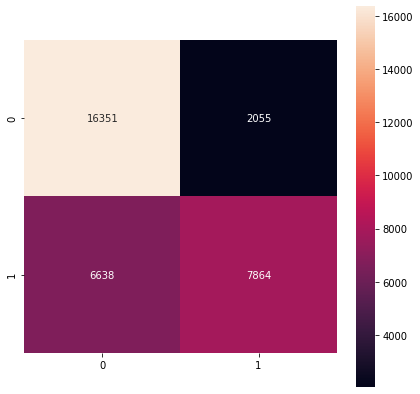

In [ ]:
my_model.fit(X_train, Y_train)
y_predicted = my_model.predict(X_test)
print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))

matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()


### df_ok_NA

In [ ]:
k_values = range(1,51,2)
param_grid = {'n_neighbors': k_values}

kNN_model_NA=KNeighborsClassifier()

grid_NA = GridSearchCV(kNN_model_NA, param_grid, cv = 3, scoring = 'accuracy',verbose = 3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(grid_NA.best_params_)

In [ ]:
my_model_NA = grid_NA.best_estimator_

Accuracy: 0.7366698124336439
              precision    recall  f1-score   support

           0       0.71      0.88      0.79     18759
           1       0.79      0.56      0.66     15149

    accuracy                           0.74     33908
   macro avg       0.75      0.72      0.72     33908
weighted avg       0.75      0.74      0.73     33908

[[16493  2266]
 [ 6663  8486]]


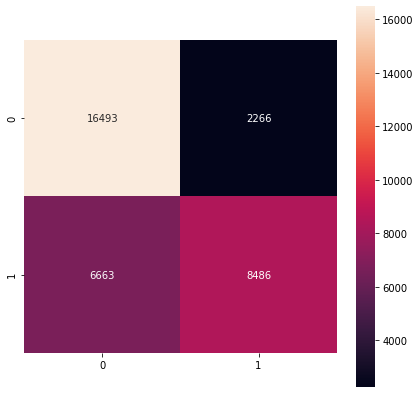

In [ ]:
my_model_NA.fit(X_train_NA, Y_train_NA)
y_predicted_NA = my_model_NA.predict(X_test_NA)
print('Accuracy:',accuracy_score(Y_test_NA, y_predicted_NA))
print(classification_report(Y_test_NA, y_predicted_NA))

matrix = confusion_matrix(Y_test_NA, y_predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## SVM

### df1_ok

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(cache_size=5000), param_grid, cv=3, verbose = 3, refit = True)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.743, total= 8.7min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.7min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.739, total=10.2min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 18.9min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.738, total= 9.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.740, total=12.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.739, total=12.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.737, total=10.2min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.742, total= 8.6min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.738, total= 8.5min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.736, total= 8.4min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 123.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=5000,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, break_ties=False, cache_size=5000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


Accuracy: 0.7381487784125441
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     18406
           1       0.80      0.55      0.65     14502

    accuracy                           0.74     32908
   macro avg       0.75      0.72      0.72     32908
weighted avg       0.75      0.74      0.73     32908

[[16380  2026]
 [ 6591  7911]]


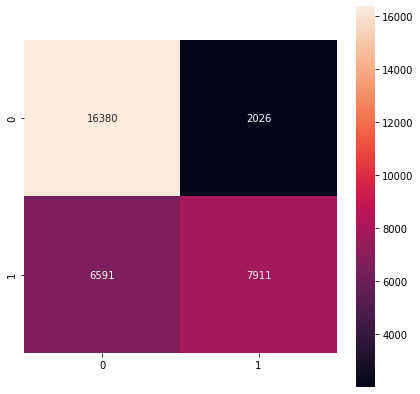

In [ ]:
y_pred = grid.predict(X_test)
  
# print classification report
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
  
grid_NA = GridSearchCV(SVC(cache_size=5000), param_grid, cv=3, verbose = 3, refit = True)
  
# fitting the model for grid search
grid_NA.fit(X_train_NA, Y_train_NA)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.735, total=14.8min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.8min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.737, total=15.0min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 29.7min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.735, total=14.7min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.737, total=18.4min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.741, total=18.8min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.737, total=18.9min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.734, total=14.0min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.737, total=14.1min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.735, total=14.0min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 200.8min finished


In [ ]:
# print best parameter after tuning
print(grid_NA.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_NA.best_estimator_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=0.1, break_ties=False, cache_size=5000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy: 0.7390881207974519
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     18759
           1       0.80      0.55      0.65     15149

    accuracy                           0.74     33908
   macro avg       0.76      0.72      0.72     33908
weighted avg       0.75      0.74      0.73     33908

[[16726  2033]
 [ 6814  8335]]


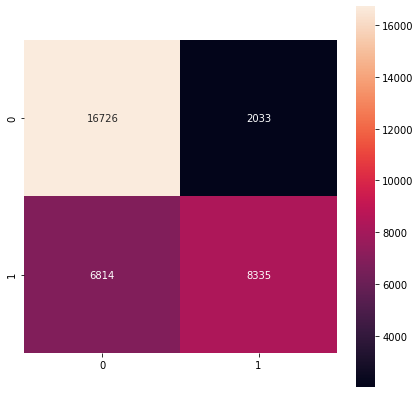

In [ ]:
y_pred_NA = grid_NA.predict(X_test_NA)
  
# print classification report
print('Accuracy:',accuracy_score(Y_test_NA, y_pred_NA))
print(classification_report(Y_test_NA, y_pred_NA))

matrix = confusion_matrix(Y_test_NA, y_pred_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Neural Network

### df1_ok

In [ ]:
neg, pos = np.bincount(df1_ok['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 164538
    Positive: 72725 (44.20% of total)



In [ ]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.90
Weight for class 1: 1.13


In [ ]:
def baseline_model():
  model = Sequential()
  model.add(Dense(2000, input_dim=X_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu')),
  model.add(Dropout(0.5)),
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [ ]:
model = baseline_model()

history = model.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
232/232 [==============================] - 20s 9ms/step - loss: 0.6533 - binary_accuracy: 0.6585 - val_loss: 0.6649 - val_binary_accuracy: 0.6862
Epoch 2/50
232/232 [==============================] - 1s 6ms/step - loss: 0.5753 - binary_accuracy: 0.7339 - val_loss: 0.6290 - val_binary_accuracy: 0.7393
Epoch 3/50
232/232 [==============================] - 1s 6ms/step - loss: 0.5715 - binary_accuracy: 0.7354 - val_loss: 0.5903 - val_binary_accuracy: 0.7413
Epoch 4/50
232/232 [==============================] - 1s 6ms/step - loss: 0.5668 - binary_accuracy: 0.7378 - val_loss: 0.5703 - val_binary_accuracy: 0.7420
Epoch 5/50
232/232 [==============================] - 1s 6ms/step - loss: 0.5704 - binary_accuracy: 0.7348 - val_loss: 0.5721 - val_binary_accuracy: 0.7429
Epoch 6/50
232/232 [==============================] - 1s 6ms/step - loss: 0.5663 

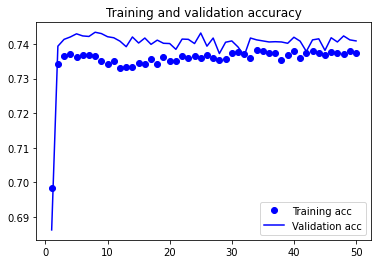

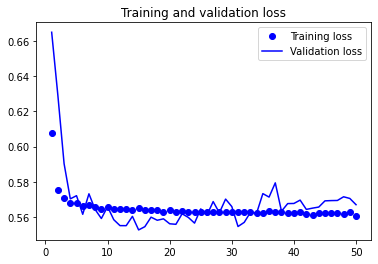

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

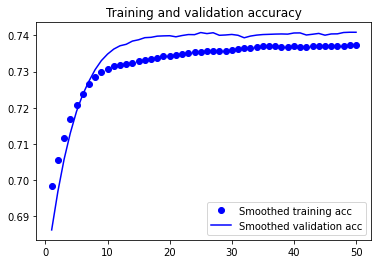

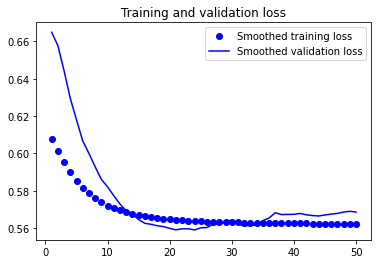

In [ ]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

1029/1029 [==============================] - 2s 2ms/step - loss: 0.5720 - binary_accuracy: 0.7361


[0.5719525814056396, 0.736143171787262]

Total accuracy: 73.61431870669746 %
[[16145  2261]
 [ 6422  8080]]


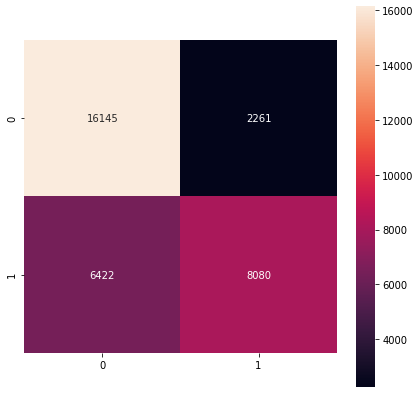

In [ ]:
predicted = np.array([int(x[0] > 0.5) for x in model.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [ ]:
neg, pos = np.bincount(df_ok_NA['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 169539
    Positive: 76244 (44.97% of total)



In [ ]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.91
Weight for class 1: 1.11


In [ ]:
def baseline_model_NA():
  model = Sequential()
  model.add(Dense(2000, input_dim=X_train_NA.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu')),
  model.add(Dropout(0.5)),
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [ ]:
model_NA = baseline_model_NA()

history = model_NA.fit(
  X_train_NA, Y_train_NA, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
239/239 [==============================] - 4s 8ms/step - loss: 0.6580 - binary_accuracy: 0.6568 - val_loss: 0.6635 - val_binary_accuracy: 0.7058
Epoch 2/50
239/239 [==============================] - 1s 6ms/step - loss: 0.5749 - binary_accuracy: 0.7320 - val_loss: 0.6292 - val_binary_accuracy: 0.7274
Epoch 3/50
239/239 [==============================] - 1s 6ms/step - loss: 0.5697 - binary_accuracy: 0.7369 - val_loss: 0.5852 - val_binary_accuracy: 0.7337
Epoch 4/50
239/239 [==============================] - 1s 6ms/step - loss: 0.5711 - binary_accuracy: 0.7369 - val_loss: 0.5784 - val_binary_accuracy: 0.7345
Epoch 5/50
239/239 [==============================] - 1s 6ms/step - loss: 0.5661 - binary_accuracy: 0.7380 - val_loss: 0.5741 - val_binary_accuracy: 0.7356
Epoch 6/50
239/239 [==============================] - 1s 6ms/step - loss: 0.5682 - binary_accuracy: 0.7343 - val_loss: 0.5759 - val_binary_accuracy: 0.7345
Epoch 7/50
239/239 [==============================] - 1s 6ms/ste

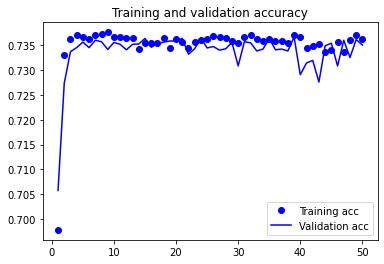

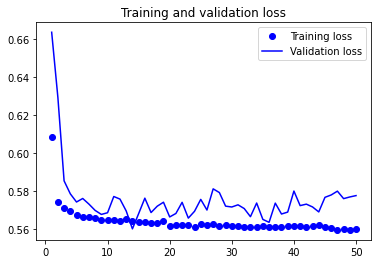

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

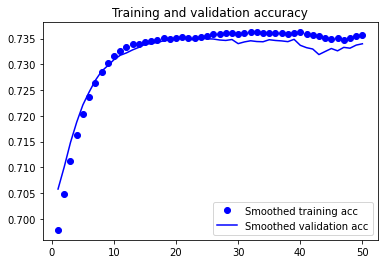

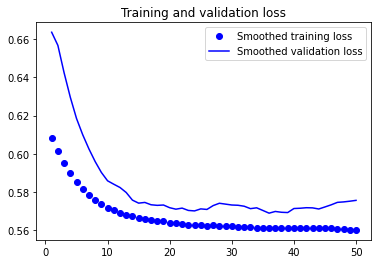

In [ ]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [ ]:
model_NA.evaluate(X_test_NA, Y_test_NA)

1060/1060 [==============================] - 2s 2ms/step - loss: 0.5745 - binary_accuracy: 0.7358


[0.5744595527648926, 0.7358145713806152]

Total accuracy: 73.58145570366875 %
[[15940  2819]
 [ 6139  9010]]


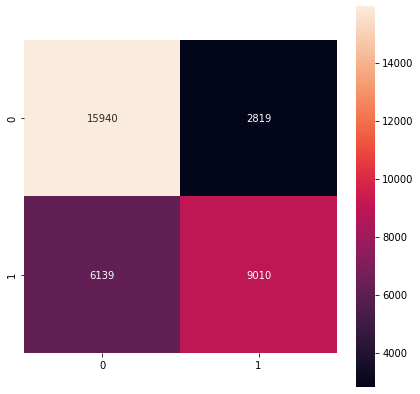

In [ ]:
predicted_NA = np.array([int(x[0] > 0.5) for x in model_NA.predict(X_test_NA)])
print("Total accuracy:", np.sum(predicted_NA==Y_test_NA) / len(predicted_NA) * 100., "%") 
matrix = confusion_matrix(Y_test_NA, predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Neural Network V2

### df1_ok

In [ ]:
neg, pos = np.bincount(df1_ok['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 164538
    Positive: 72725 (44.20% of total)



In [ ]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.90
Weight for class 1: 1.13


In [ ]:
def baseline_model2():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [ ]:
model2 = baseline_model2()

history = model2.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
232/232 [==============================] - 2s 4ms/step - loss: 0.7203 - binary_accuracy: 0.6309 - val_loss: 0.5935 - val_binary_accuracy: 0.7217
Epoch 2/50
232/232 [==============================] - 1s 3ms/step - loss: 0.5857 - binary_accuracy: 0.7147 - val_loss: 0.5638 - val_binary_accuracy: 0.7353
Epoch 3/50
232/232 [==============================] - 1s 3ms/step - loss: 0.5665 - binary_accuracy: 0.7276 - val_loss: 0.5558 - val_binary_accuracy: 0.7394
Epoch 4/50
232/232 [==============================] - 1s 3ms/step - loss: 0.5621 - binary_accuracy: 0.7323 - val_loss: 0.5544 - val_binary_accuracy: 0.7395
Epoch 5/50
232/232 [==============================] - 1s 3ms/step - loss: 0.5577 - binary_accuracy: 0.7360 - val_loss: 0.5534 - val_binary_accuracy: 0.7408
Epoch 6/50
232/232 [==============================] - 1s 3ms/step - loss: 0.5599 - binary_accuracy: 0.7353 - val_loss: 0.5522 - val_binary_accuracy: 0.7405
Epoch 7/50
232/232 [==============================] - 1s 3ms/ste

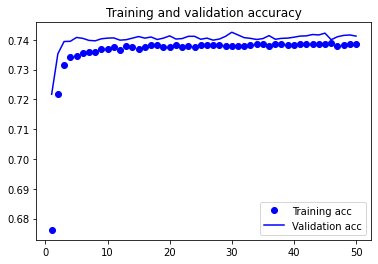

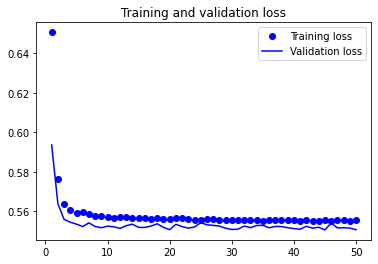

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

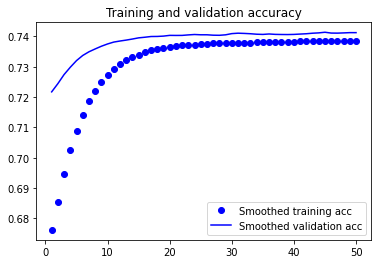

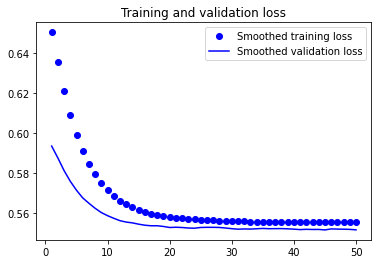

In [ ]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [ ]:
model2.evaluate(X_test, Y_test)

1029/1029 [==============================] - 2s 2ms/step - loss: 0.5534 - binary_accuracy: 0.7364


[0.5534453988075256, 0.7363559007644653]

Total accuracy: 73.63559013005955 %
[[16021  2385]
 [ 6291  8211]]


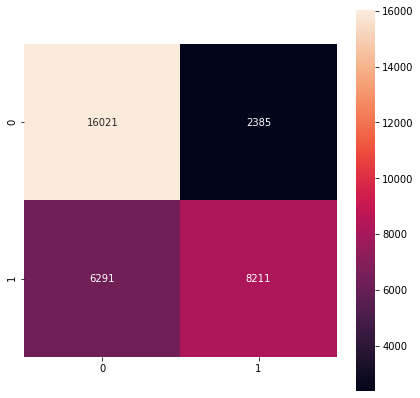

In [ ]:
predicted = np.array([int(x[0] > 0.5) for x in model2.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [ ]:
neg, pos = np.bincount(df_ok_NA['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 169539
    Positive: 76244 (44.97% of total)



In [ ]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.91
Weight for class 1: 1.11


In [ ]:
def baseline_model2_NA():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train_NA.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [ ]:
model2_NA = baseline_model2_NA()

history = model2_NA.fit(
  X_train_NA, Y_train_NA, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
239/239 [==============================] - 2s 4ms/step - loss: 0.7231 - binary_accuracy: 0.6387 - val_loss: 0.5686 - val_binary_accuracy: 0.7325
Epoch 2/50
239/239 [==============================] - 1s 3ms/step - loss: 0.5713 - binary_accuracy: 0.7239 - val_loss: 0.5564 - val_binary_accuracy: 0.7352
Epoch 3/50
239/239 [==============================] - 1s 3ms/step - loss: 0.5607 - binary_accuracy: 0.7345 - val_loss: 0.5559 - val_binary_accuracy: 0.7341
Epoch 4/50
239/239 [==============================] - 1s 3ms/step - loss: 0.5573 - binary_accuracy: 0.7366 - val_loss: 0.5565 - val_binary_accuracy: 0.7350
Epoch 5/50
239/239 [==============================] - 1s 3ms/step - loss: 0.5567 - binary_accuracy: 0.7377 - val_loss: 0.5577 - val_binary_accuracy: 0.7355
Epoch 6/50
239/239 [==============================] - 1s 3ms/step - loss: 0.5576 - binary_accuracy: 0.7366 - val_loss: 0.5567 - val_binary_accuracy: 0.7344
Epoch 7/50
239/239 [==============================] - 1s 3ms/ste

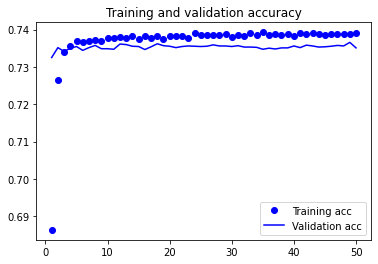

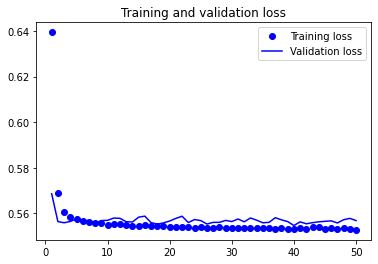

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

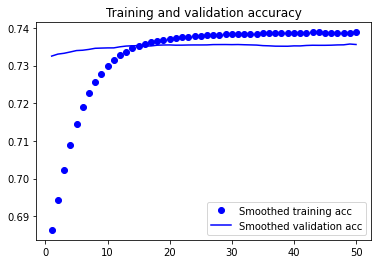

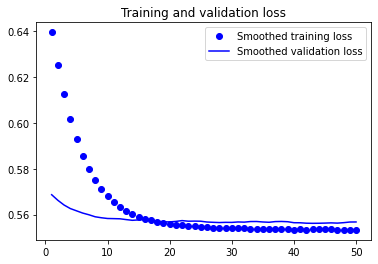

In [ ]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [ ]:
model2_NA.evaluate(X_test_NA, Y_test_NA)

1060/1060 [==============================] - 2s 2ms/step - loss: 0.5501 - binary_accuracy: 0.7390


[0.550126850605011, 0.7390291094779968]

Total accuracy: 73.90291376666273 %
[[16236  2523]
 [ 6326  8823]]


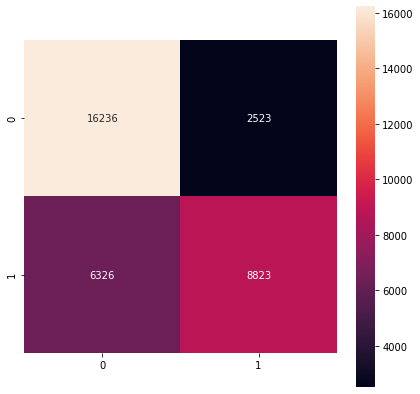

In [ ]:
predicted_NA = np.array([int(x[0] > 0.5) for x in model2_NA.predict(X_test_NA)])
print("Total accuracy:", np.sum(predicted_NA==Y_test_NA) / len(predicted_NA) * 100., "%") 
matrix = confusion_matrix(Y_test_NA, predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Cli & Cli_who

### Cli

In [63]:
X_NA = df_NA_BR['Cli']
Y_NA = df_NA_BR['B8.1']

X = df_no_na_BR['Cli']
Y = df_no_na_BR['B8.1']



X=X.values.reshape(-1,1)
X_NA=X_NA.values.reshape(-1,1)

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA, Y_NA, test_size = 0.2, random_state=2)

Accuracy Score: 0.5652386481696511
Area Under Curve: 0.5755748028322466
Recall score: 0.1831606526140288

Specificity: 0.9679889530504645
F1 score: 0.301864573110893
Precision score: 0.8577802565532627
[[7711  255]
 [6859 1538]]

              precision    recall  f1-score   support

           0       0.53      0.97      0.68      7966
           1       0.86      0.18      0.30      8397

    accuracy                           0.57     16363
   macro avg       0.69      0.58      0.49     16363
weighted avg       0.70      0.57      0.49     16363



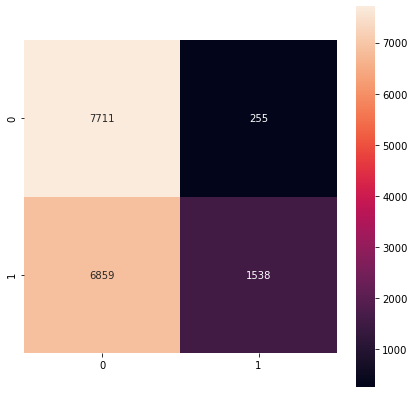

In [65]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,X_test)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, X_test)}')
print(f'Recall score: {recall_score(Y_test,X_test)}')
print("")
matrix = confusion_matrix(Y_test, X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, X_test).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,X_test)}')
print(f'Precision score: {precision_score(Y_test,X_test)}')
print(matrix)
print("")
print(classification_report(Y_test, X_test))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

Accuracy Score: 0.5518904060204587
Area Under Curve: 0.5790805946309644
Recall score: 0.18955349620893008

Specificity: 0.9686076930529988
F1 score: 0.31154804763223487
Precision score: 0.8741258741258742
[[9997  324]
 [9620 2250]]

              precision    recall  f1-score   support

           0       0.51      0.97      0.67     10321
           1       0.87      0.19      0.31     11870

    accuracy                           0.55     22191
   macro avg       0.69      0.58      0.49     22191
weighted avg       0.70      0.55      0.48     22191



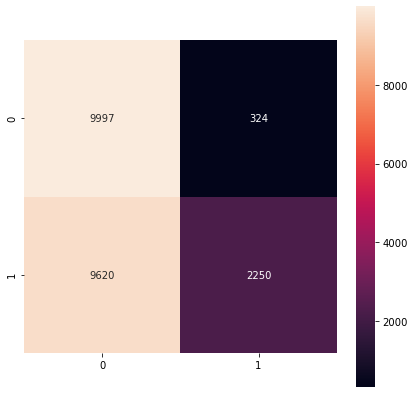

In [66]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,X_test_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, X_test_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,X_test_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, X_test_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, X_test_NA).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,X_test_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,X_test_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, X_test_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Cli_who

In [67]:
X_NA = df_NA_BR['Cli_who']
Y_NA = df_NA_BR['B8.1']

X = df_no_na_BR['Cli_who']
Y = df_no_na_BR['B8.1']


X=X.values.reshape(-1,1)
X_NA=X_NA.values.reshape(-1,1)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA, Y_NA, test_size = 0.2, random_state=2)

Accuracy Score: 0.5472712827721078
Area Under Curve: 0.558364945444721
Recall score: 0.13719185423365488

Specificity: 0.9795380366557871
F1 score: 0.23723228995057657
Precision score: 0.8760456273764259
[[7803  163]
 [7245 1152]]

              precision    recall  f1-score   support

           0       0.52      0.98      0.68      7966
           1       0.88      0.14      0.24      8397

    accuracy                           0.55     16363
   macro avg       0.70      0.56      0.46     16363
weighted avg       0.70      0.55      0.45     16363



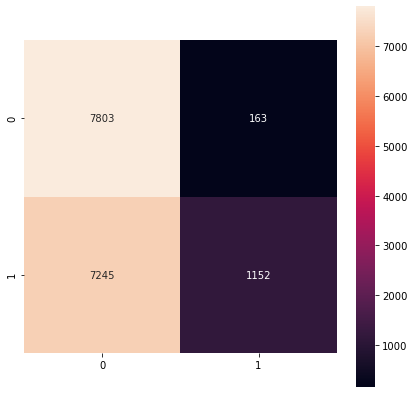

In [69]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,X_test)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, X_test)}')
print(f'Recall score: {recall_score(Y_test,X_test)}')
print("")
matrix = confusion_matrix(Y_test, X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, X_test).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,X_test)}')
print(f'Precision score: {precision_score(Y_test,X_test)}')
print(matrix)
print("")
print(classification_report(Y_test, X_test))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

Accuracy Score: 0.5302600153215268
Area Under Curve: 0.5595885757169582
Recall score: 0.13942712721145745

Specificity: 0.979750024222459
F1 score: 0.24100771807193827
Precision score: 0.8878755364806867
[[10112   209]
 [10215  1655]]

              precision    recall  f1-score   support

           0       0.50      0.98      0.66     10321
           1       0.89      0.14      0.24     11870

    accuracy                           0.53     22191
   macro avg       0.69      0.56      0.45     22191
weighted avg       0.71      0.53      0.44     22191



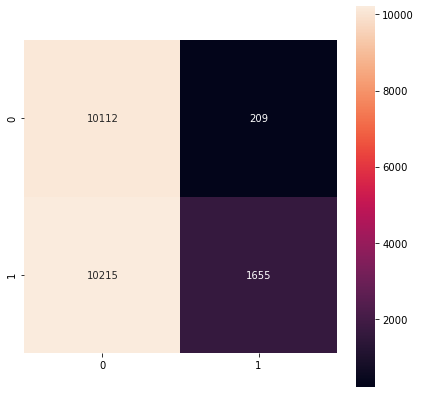

In [70]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,X_test_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, X_test_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,X_test_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, X_test_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, X_test_NA).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,X_test_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,X_test_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, X_test_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

# LogisticRegression

### No weights

In [2]:
df_BR = pd.read_csv('BR_Filter.csv')

df_BR.shape

(110952, 152)

In [3]:
# dataframe filter
df_filter_BR = df_BR

In [4]:
# Delete NA
col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','E3.NA','E4.NA','E2.NA']

for i in range(len(col_names)):
    df_filter_na_BR = df_filter_BR.drop(df_filter_BR[df_filter_BR[col_names[i]]==1].index)
    df_filter_BR= df_filter_na_BR

df_filter_na_BR = df_filter_BR

In [5]:
df_filter_na_BR.shape

(81811, 152)

In [6]:
# dataframe without NA
df_no_na_BR = df_filter_na_BR

In [7]:
# dataframe with NA

df_NA_BR = pd.read_csv("BR_Filter.csv")
#df_NA_BR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BR_Filter.csv')

In [8]:
df_no_na_BR.shape

(81811, 152)

In [9]:
df_NA_BR.shape

(110952, 152)

In [10]:
df1_ok_BR = df_no_na_BR[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

df_ok_NA_BR = df_NA_BR[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

In [11]:
df1_ok_BR.shape

(81811, 27)

In [12]:
df_ok_NA_BR.shape

(110952, 39)

In [13]:
X_BR = df1_ok_BR.drop(['B8.1'], axis=1)
Y_BR = df1_ok_BR['B8.1']

X_NA_BR = df_ok_NA_BR.drop(['B8.1'], axis=1)
Y_NA_BR = df_ok_NA_BR['B8.1']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_BR, Y_BR, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA_BR, Y_NA_BR, test_size = 0.2, random_state=2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print()
print(X_train_NA.shape)
print(X_test_NA.shape)
print(Y_train_NA.shape)
print(Y_test_NA.shape)

(65448, 26)
(16363, 26)
(65448,)
(16363,)

(88761, 38)
(22191, 38)
(88761,)
(22191,)


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

## df1_ok

Accuracy Score: 0.7439955998288822
Area Under Curve: 0.7466803283969973
Recall score: 0.6447540788376801

Specificity: 0.8486065779563143
F1 score: 0.7210494772591063
Precision score: 0.8178247734138973
[[6760 1206]
 [2983 5414]]

              precision    recall  f1-score   support

           0       0.69      0.85      0.76      7966
           1       0.82      0.64      0.72      8397

    accuracy                           0.74     16363
   macro avg       0.76      0.75      0.74     16363
weighted avg       0.76      0.74      0.74     16363



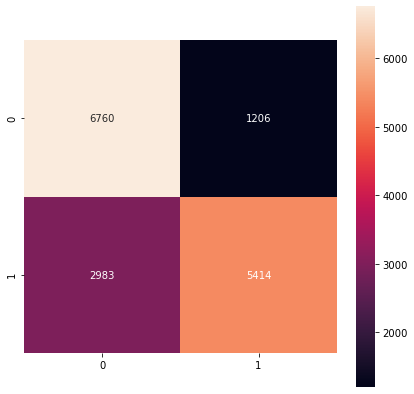

In [19]:
# define model
lg1 = LogisticRegression(random_state=2, class_weight=None)
# fit it
lg1.fit(X_train,Y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## df_ok_na

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.7436348069036997
Area Under Curve: 0.7487994679956219
Recall score: 0.6748104465037911

Specificity: 0.8227884894874528
F1 score: 0.7379427887051452
Precision score: 0.8141071247077956
[[8492 1829]
 [3860 8010]]

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     10321
           1       0.81      0.67      0.74     11870

    accuracy                           0.74     22191
   macro avg       0.75      0.75      0.74     22191
weighted avg       0.76      0.74      0.74     22191



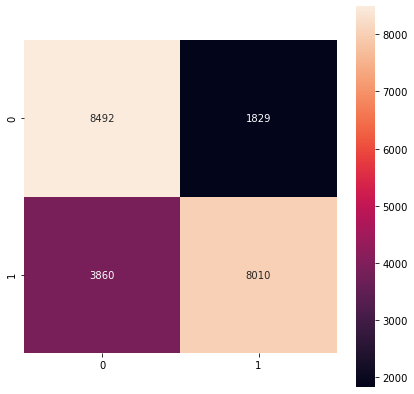

In [21]:
# define model
lg1_na = LogisticRegression(random_state=2, class_weight=None)
# fit it
lg1_na.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg1_na.predict(X_test_NA)
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_na))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Weights

### df1_ok

In [22]:
# check the distribution
df1_ok_BR['B8.1'].value_counts()/df1_ok_BR.shape[0]

1    0.511789
0    0.488211
Name: B8.1, dtype: float64

In [26]:
# define class weights
w = {0:49, 1:51}
# define model
lg2 = LogisticRegression(random_state=2, class_weight=w)
# fit it
lg2.fit(X_train,Y_train)
# test
y_pred = lg2.predict(X_test)

Accuracy Score: 0.7451567560960703
Area Under Curve: 0.7476441573124986
Recall score: 0.653209479576039

Specificity: 0.8420788350489581
F1 score: 0.7245706737120211
Precision score: 0.8134361560136438
[[6708 1258]
 [2912 5485]]

              precision    recall  f1-score   support

           0       0.70      0.84      0.76      7966
           1       0.81      0.65      0.72      8397

    accuracy                           0.75     16363
   macro avg       0.76      0.75      0.74     16363
weighted avg       0.76      0.75      0.74     16363



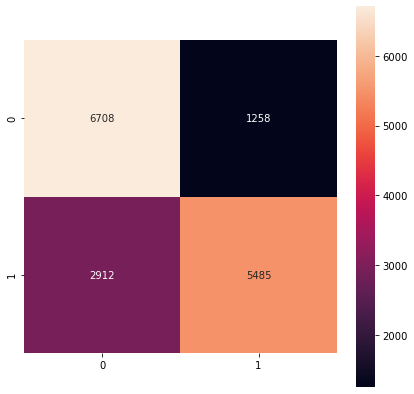

In [27]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_na

In [25]:
# check the distribution
df_ok_NA_BR['B8.1'].value_counts()/df_ok_NA_BR.shape[0]

1    0.534249
0    0.465751
Name: B8.1, dtype: float64

In [28]:
# define class weights
w = {0:47, 1:53}
# define model
lg2_NA = LogisticRegression(random_state=2, class_weight=w)
# fit it
lg2_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg2_NA.predict(X_test_NA)

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.7431391104501825
Area Under Curve: 0.7464711489085771
Recall score: 0.6987363100252738

Specificity: 0.7942059877918807
F1 score: 0.744256999282125
Precision score: 0.7961220963716644
[[8197 2124]
 [3576 8294]]

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10321
           1       0.80      0.70      0.74     11870

    accuracy                           0.74     22191
   macro avg       0.75      0.75      0.74     22191
weighted avg       0.75      0.74      0.74     22191



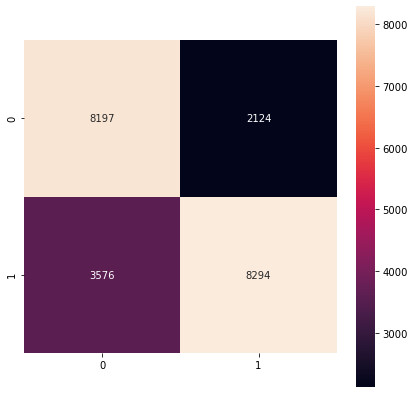

In [29]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## LogisticRegression. GridSearch

### df1_ok

In [31]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

## Max accuracy

In [32]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="accuracy", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.7416269844674478 with param: {'class_weight': {0: 1.0, 1: 1.0}}


In [33]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.7439955998288822
Area Under Curve: 0.7466803283969973
Recall score: 0.6447540788376801

Specificity: 0.8486065779563143
F1 score: 0.7210494772591063
Precision score: 0.8178247734138973
[[6760 1206]
 [2983 5414]]

              precision    recall  f1-score   support

           0       0.69      0.85      0.76      7966
           1       0.82      0.64      0.72      8397

    accuracy                           0.74     16363
   macro avg       0.76      0.75      0.74     16363
weighted avg       0.76      0.74      0.74     16363



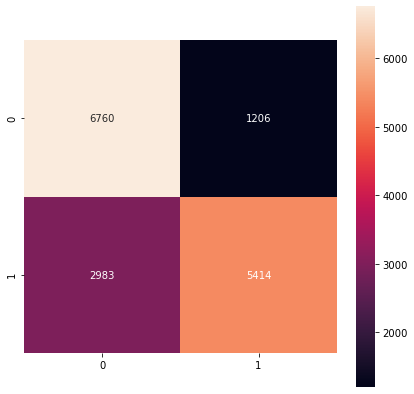

In [34]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Max Roc_auc

In [35]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.8009796700286078 with param: {'class_weight': {0: 1.0, 1: 500}}


C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 500})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.5131699566094237
Area Under Curve: 0.5
Recall score: 1.0

Specificity: 0.0
F1 score: 0.6782714054927301
Precision score: 0.5131699566094237
[[   0 7966]
 [   0 8397]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7966
           1       0.51      1.00      0.68      8397

    accuracy                           0.51     16363
   macro avg       0.26      0.50      0.34     16363
weighted avg       0.26      0.51      0.35     16363



C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


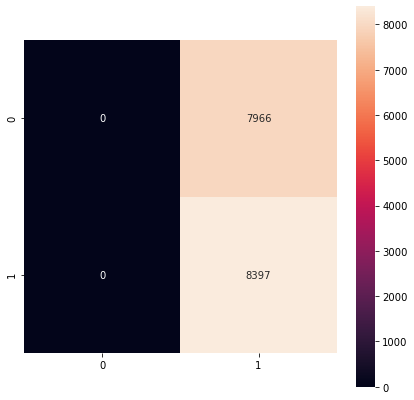

In [37]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Max f1

In [38]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.7182501165655881 with param: {'class_weight': {0: 1.0, 1: 1.0}}


In [39]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.7439955998288822
Area Under Curve: 0.7466803283969973
Recall score: 0.6447540788376801

Specificity: 0.8486065779563143
F1 score: 0.7210494772591063
Precision score: 0.8178247734138973
[[6760 1206]
 [2983 5414]]

              precision    recall  f1-score   support

           0       0.69      0.85      0.76      7966
           1       0.82      0.64      0.72      8397

    accuracy                           0.74     16363
   macro avg       0.76      0.75      0.74     16363
weighted avg       0.76      0.74      0.74     16363



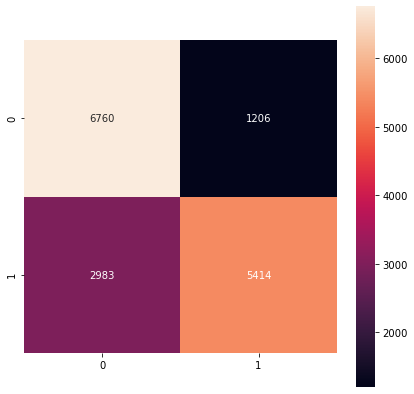

In [40]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Max recall

In [41]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="recall", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 1.0 with param: {'class_weight': {0: 0.01, 1: 1.0}}


In [42]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 0.01, 1: 1.0})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.5131699566094237
Area Under Curve: 0.5
Recall score: 1.0

Specificity: 0.0
F1 score: 0.6782714054927301
Precision score: 0.5131699566094237
[[   0 7966]
 [   0 8397]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7966
           1       0.51      1.00      0.68      8397

    accuracy                           0.51     16363
   macro avg       0.26      0.50      0.34     16363
weighted avg       0.26      0.51      0.35     16363



C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


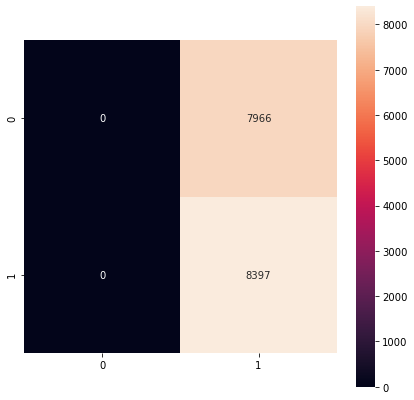

In [43]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Max precision

In [44]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="precision", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.9177273179244535 with param: {'class_weight': {0: 1.0, 1: 0.1}}


In [45]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 0.1})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.5788058424494286
Area Under Curve: 0.5891353080292326
Recall score: 0.1969751101583899

Specificity: 0.9812955059000753
F1 score: 0.32431372549019605
Precision score: 0.9173599556295063
[[7817  149]
 [6743 1654]]

              precision    recall  f1-score   support

           0       0.54      0.98      0.69      7966
           1       0.92      0.20      0.32      8397

    accuracy                           0.58     16363
   macro avg       0.73      0.59      0.51     16363
weighted avg       0.73      0.58      0.50     16363



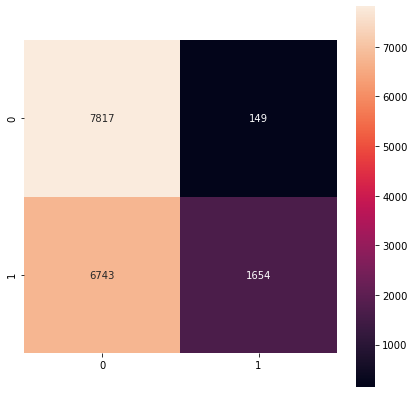

In [46]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## df_ok_na

In [47]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

## Max acc

In [48]:
# define model
lg3_NA = LogisticRegression(random_state=2)
# define evaluation procedure
grid_NA = GridSearchCV(lg3_NA,hyperparam_grid,scoring="accuracy", cv=5, n_jobs=-1, refit=True,verbose=3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(f'Best score: {grid_NA.best_score_} with param: {grid_NA.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.7370579700307461 with param: {'class_weight': {0: 1.0, 1: 1.0}}


C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# define model
lg3_NA = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg3_NA.predict(X_test_NA)

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.7436348069036997
Area Under Curve: 0.7487994679956219
Recall score: 0.6748104465037911

Specificity: 0.8227884894874528
F1 score: 0.7379427887051452
Precision score: 0.8141071247077956
[[8492 1829]
 [3860 8010]]

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     10321
           1       0.81      0.67      0.74     11870

    accuracy                           0.74     22191
   macro avg       0.75      0.75      0.74     22191
weighted avg       0.76      0.74      0.74     22191



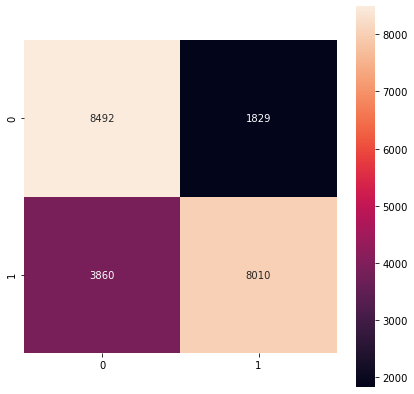

In [50]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Max Roc_auc

In [51]:
# define model
lg3_NA = LogisticRegression(random_state=2)
# define evaluation procedure
grid_NA = GridSearchCV(lg3_NA,hyperparam_grid,scoring="roc_auc", cv=5, n_jobs=-1, refit=True,verbose=3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(f'Best score: {grid_NA.best_score_} with param: {grid_NA.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.8007574253261989 with param: {'class_weight': {0: 1.0, 1: 100}}


C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# define model
lg3_NA = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 100})
# fit it
lg3_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg3_NA.predict(X_test_NA)

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.5349015366590059
Area Under Curve: 0.5
Recall score: 1.0

Specificity: 0.0
F1 score: 0.696984821349931
Precision score: 0.5349015366590059
[[    0 10321]
 [    0 11870]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10321
           1       0.53      1.00      0.70     11870

    accuracy                           0.53     22191
   macro avg       0.27      0.50      0.35     22191
weighted avg       0.29      0.53      0.37     22191



C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


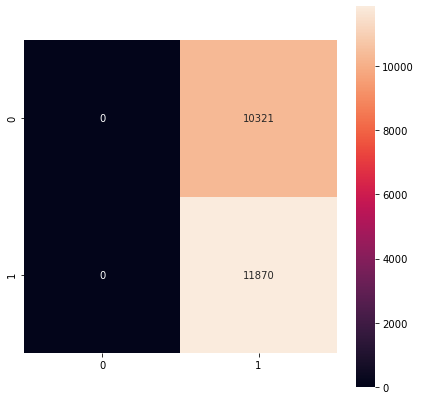

In [53]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Max f1

In [54]:
# define model
lg3_NA = LogisticRegression(random_state=2)
# define evaluation procedure
grid_NA = GridSearchCV(lg3_NA,hyperparam_grid,scoring="f1", cv=5, n_jobs=-1, refit=True,verbose=3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(f'Best score: {grid_NA.best_score_} with param: {grid_NA.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.7305586677135772 with param: {'class_weight': {0: 1.0, 1: 1.0}}


C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# define model
lg3_NA = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg3_NA.predict(X_test_NA)

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.7436348069036997
Area Under Curve: 0.7487994679956219
Recall score: 0.6748104465037911

Specificity: 0.8227884894874528
F1 score: 0.7379427887051452
Precision score: 0.8141071247077956
[[8492 1829]
 [3860 8010]]

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     10321
           1       0.81      0.67      0.74     11870

    accuracy                           0.74     22191
   macro avg       0.75      0.75      0.74     22191
weighted avg       0.76      0.74      0.74     22191



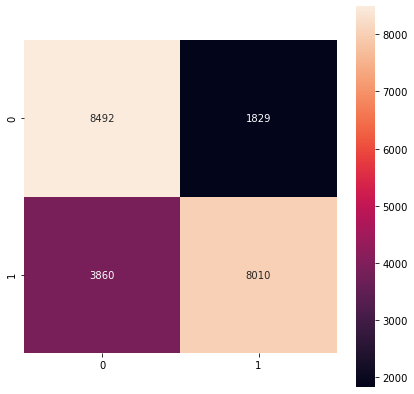

In [56]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Max recall

In [57]:
# define model
lg3_NA = LogisticRegression(random_state=2)
# define evaluation procedure
grid_NA = GridSearchCV(lg3_NA,hyperparam_grid,scoring="recall", cv=5, n_jobs=-1, refit=True,verbose=3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(f'Best score: {grid_NA.best_score_} with param: {grid_NA.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 1.0 with param: {'class_weight': {0: 0.01, 1: 1.0}}


In [58]:
# define model
lg3_NA = LogisticRegression(random_state=2, class_weight={0: 0.01, 1: 1.0})
# fit it
lg3_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg3_NA.predict(X_test_NA)

Accuracy Score: 0.5349015366590059
Area Under Curve: 0.5
Recall score: 1.0

Specificity: 0.0
F1 score: 0.696984821349931
Precision score: 0.5349015366590059
[[    0 10321]
 [    0 11870]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10321
           1       0.53      1.00      0.70     11870

    accuracy                           0.53     22191
   macro avg       0.27      0.50      0.35     22191
weighted avg       0.29      0.53      0.37     22191



C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


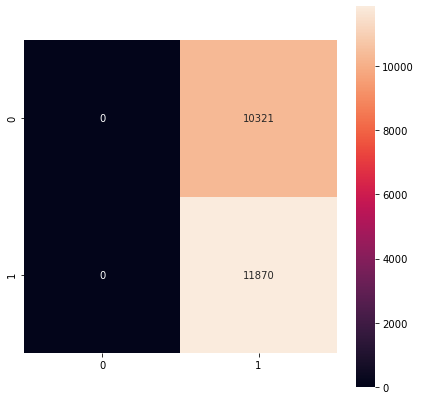

In [59]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Max precision

In [60]:
# define model
lg3_NA = LogisticRegression(random_state=2)
# define evaluation procedure
grid_NA = GridSearchCV(lg3_NA,hyperparam_grid,scoring="precision", cv=5, n_jobs=-1, refit=True,verbose=3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(f'Best score: {grid_NA.best_score_} with param: {grid_NA.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.9171281601013611 with param: {'class_weight': {0: 1.0, 1: 0.1}}


In [61]:
# define model
lg3_NA = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 0.1})
# fit it
lg3_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg3_NA.predict(X_test_NA)

Accuracy Score: 0.5723942138704881
Area Under Curve: 0.5989609360913172
Recall score: 0.21836562763268744

Specificity: 0.9795562445499467
F1 score: 0.35330198323451234
Precision score: 0.9247235105244381
[[10110   211]
 [ 9278  2592]]

              precision    recall  f1-score   support

           0       0.52      0.98      0.68     10321
           1       0.92      0.22      0.35     11870

    accuracy                           0.57     22191
   macro avg       0.72      0.60      0.52     22191
weighted avg       0.74      0.57      0.51     22191



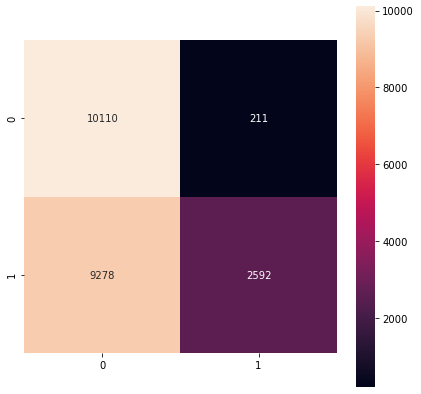

In [62]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()